# Breast Cancer Survival Prediction with Machine Learning

# Hacklytics '23 Project - Breast Cancer Prediction (Healthcare)

### Introduction
Breast cancer is one of the most common types of cancer that affects women globally. Early detection of breast cancer is crucial for successful treatment and improving survival rates. 

In this project, we aim to develop a breast cancer prediction model using Support Vector Machines (SVM) algorithm, specifically the Support Vector Classification (SVC) variant.

### Understanding the Data

Patient_ID: unique identifier id of a patient

Age: Age of patient (Years)

Gender: Male or Female.

Protein1, Protein2, Protein3, Protein4: biomarkers for the dectection of breast cancer.

Tumour_Stage: I, II, III: describing the extensiveness of brest cancer

Histology: Infiltrating Ductal Carcinoma, Infiltrating Lobular Carcinoma, Mucinous Carcinoma.

ER status: Positive/Negative:(Estrogen receptor): determines the type of breast cancer to determine treatment.

PR status: Positive/Negative:(Progesterone receptor): determines the type of breast cancer to determine treatment.

HER2 status: Positive/Negative.(human epidermal growth factor receptor2):  promotes the growth of cancer cells . 

Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other surgery type.

Date of Surgery: the date the surgery was performed (in DD-MMM-YY).

Date of Last_Visit: Date of last visit (in DD-MMM-YY) to the hospital.
Patient_Status: If Alive or Dead 

Importing and reading data.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
data= pd.read_csv("../input/breastcancerdataset/BRCA.csv")
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

## Data Cleaning

In [73]:
data.isnull().sum() #sum of number of null values in each column

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [74]:
data.loc[data.isnull().any(axis=1)] #The location of null values in the dataset

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
7,TCGA-A7-A426,50.0,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
22,TCGA-AN-A0FY,55.0,FEMALE,0.330640,0.84757,-0.494660,0.116560,I,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,07-Nov-17,NaN,NaN
99,TCGA-A8-A06O,60.0,FEMALE,0.532420,1.54110,-1.009500,-0.125880,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,11-Dec-17,NaN,NaN
111,TCGA-MS-A51U,44.0,FEMALE,-0.278840,2.16880,-0.462330,0.272200,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,20-Jan-18,NaN,NaN
170,TCGA-AR-A0U2,47.0,FEMALE,0.515580,2.65020,-0.103130,-0.045725,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,29-Jul-18,NaN,Dead
182,TCGA-C8-A1HI,40.0,FEMALE,-1.455300,-0.74177,1.133600,-0.839700,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,07-Sep-18,NaN,NaN
189,TCGA-AO-A03O,69.0,FEMALE,-0.757790,-0.33780,0.561410,0.208300,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,07-Oct-18,NaN,Dead
196,TCGA-C8-A12U,46.0,FEMALE,-0.010999,0.86749,0.281570,-0.545880,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,10-Jun-19,NaN,NaN
206,TCGA-E9-A1NH,71.0,FEMALE,0.394090,1.70540,0.035642,1.441000,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,26-Nov-18,NaN,NaN
219,TCGA-C8-A12X,62.0,FEMALE,0.649340,1.81680,0.279260,0.132280,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,20-Jun-19,NaN,NaN


In [75]:
data=data.loc[:333] #To slice out na/null rows out.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [76]:
data.isna().sum() #to check the remaining null values still present.

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

The null values present are on date of last visit and patient status. This data cannot be filled manually, so the null values may be dropped 

In [77]:
data.dropna(inplace = True) #To drop all the null values in the  data
data

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


In [78]:
data.isna().sum()# data has zero null values after dropping all null values

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [79]:
print(data.duplicated()) #To check for duplicates in the data

0      False
1      False
2      False
3      False
4      False
       ...  
329    False
330    False
331    False
332    False
333    False
Length: 317, dtype: bool


In [80]:
data.drop(columns = [ "Patient_ID","Date_of_Surgery","Date_of_Last_Visit"], inplace = True)
data #to drop the features that are not needed.

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,Dead
330,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,Dead
331,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
332,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Dead


## Data Exploration

In [81]:
data.dtypes # data types of all the columns

Age               float64
Gender             object
Protein1          float64
Protein2          float64
Protein3          float64
Protein4          float64
Tumour_Stage       object
Histology          object
ER status          object
PR status          object
HER2 status        object
Surgery_type       object
Patient_Status     object
dtype: object

In [82]:
data.Gender.describe()

count        317
unique         2
top       FEMALE
freq         313
Name: Gender, dtype: object

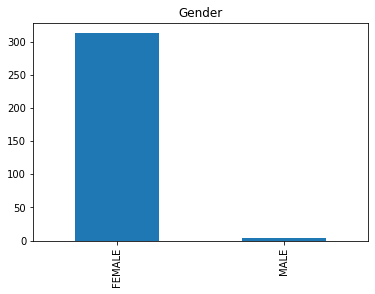

In [83]:
data.Gender.value_counts().plot(kind='bar',title='Gender')
plt.show()

In [84]:
data["Tumour_Stage"].describe()

count     317
unique      3
top        II
freq      180
Name: Tumour_Stage, dtype: object

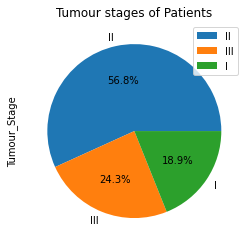

In [85]:
data['Tumour_Stage'].value_counts().plot(kind='pie',title='Tumour stages of Patients',legend=True,autopct='%1.1f%%')
plt.show()

In [86]:
data["Histology"].describe()

count                               317
unique                                3
top       Infiltrating Ductal Carcinoma
freq                                224
Name: Histology, dtype: object

In [87]:
data['Histology'].value_counts()

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

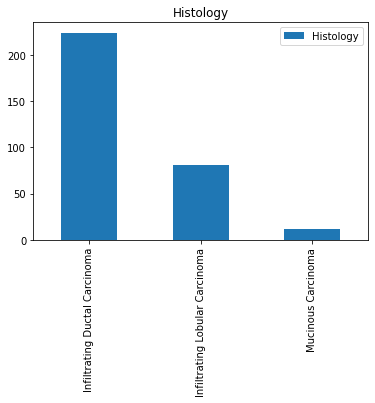

In [88]:
data['Histology'].value_counts().plot(kind='bar',title='Histology',legend=True);

In [89]:
data['ER status'].describe()

count          317
unique           1
top       Positive
freq           317
Name: ER status, dtype: object

In [90]:
data['PR status'].describe()

count          317
unique           1
top       Positive
freq           317
Name: PR status, dtype: object

In [91]:
data['HER2 status'].describe()

count          317
unique           2
top       Negative
freq           288
Name: HER2 status, dtype: object

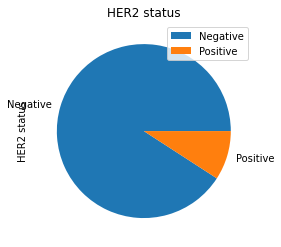

In [92]:
data['HER2 status'].value_counts().plot(kind='pie', title='HER2 status', legend=True)
plt.show()

In [93]:
data['Surgery_type'].describe()

count       317
unique        4
top       Other
freq         97
Name: Surgery_type, dtype: object

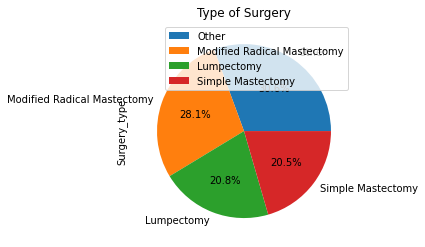

In [94]:
data['Surgery_type'].value_counts().plot(kind='pie',title='Type of Surgery',legend=True,autopct='%1.1f%%');

In [95]:
data['Patient_Status'].describe()

count       317
unique        2
top       Alive
freq        255
Name: Patient_Status, dtype: object

In [96]:
data['Patient_Status'].value_counts()

Alive    255
Dead      62
Name: Patient_Status, dtype: int64

## Comparing the columns

In [97]:
table=pd.crosstab(data['Tumour_Stage'],data['Gender'])
table

Gender,FEMALE,MALE
Tumour_Stage,,
I,60,0
II,177,3
III,76,1


<AxesSubplot:xlabel='Tumour_Stage'>

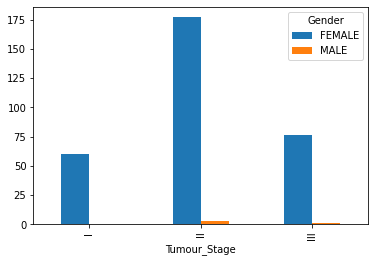

In [98]:
table.plot(kind='bar')

In [99]:
table=pd.crosstab(data['Surgery_type'],data['Gender'])
table

Gender,FEMALE,MALE
Surgery_type,,
Lumpectomy,66,0
Modified Radical Mastectomy,87,2
Other,96,1
Simple Mastectomy,64,1


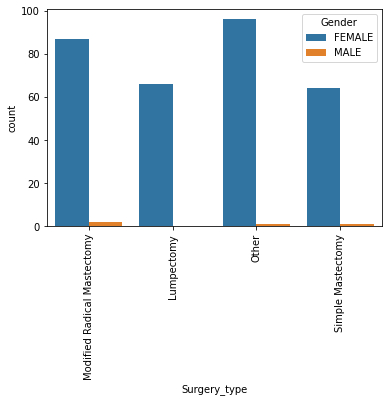

In [100]:
sns.countplot(x="Surgery_type", data=data, hue="Gender")
plt.xticks(rotation =90)
plt.show()

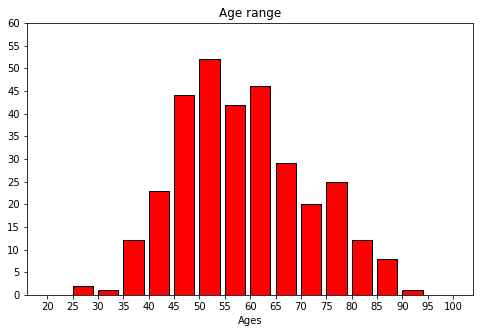

In [101]:
x = list(range(20,105,5))
plt.figure(figsize=(8,5))
plt.hist(data['Age'].astype(int),width=4, align='mid', bins = x, color='red', edgecolor = 'black')
plt.xticks(x)
plt.xlabel('Ages')
plt.title('Age range')
plt.yticks(np.arange(0,65,5))
plt.show()

In [102]:
table=pd.crosstab(data['Patient_Status'],data['Gender'])
table

Gender,FEMALE,MALE
Patient_Status,,
Alive,252,3
Dead,61,1


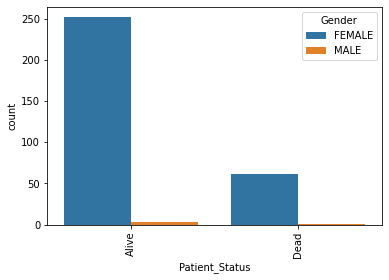

In [103]:
sns.countplot(x="Patient_Status", data=data, hue="Gender")
plt.xticks(rotation =90)
plt.show()

In [104]:
table=pd.crosstab(data['Patient_Status'],data['Surgery_type'])
table

Surgery_type,Lumpectomy,Modified Radical Mastectomy,Other,Simple Mastectomy
Patient_Status,,,,
Alive,57,72,73,53
Dead,9,17,24,12


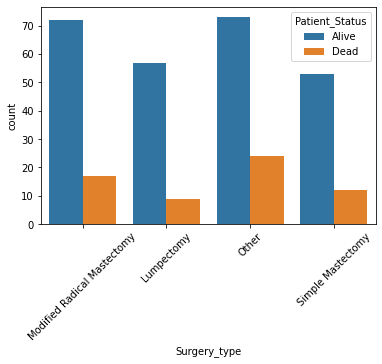

In [105]:
sns.countplot(x="Surgery_type", data=data, hue="Patient_Status")
plt.xticks(rotation = 45)
plt.show()

In [106]:
table=pd.crosstab(data['Patient_Status'],data['Tumour_Stage'])
table

Tumour_Stage,I,II,III
Patient_Status,,,
Alive,51,144,60
Dead,9,36,17


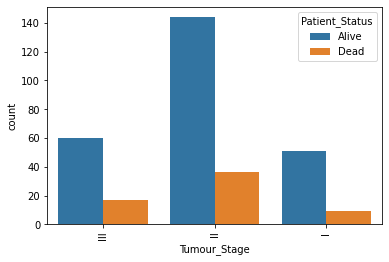

In [107]:
sns.countplot(x="Tumour_Stage", data=data, hue="Patient_Status")
plt.xticks(rotation =90)
plt.show()

In [108]:
table=pd.crosstab(data['Patient_Status'],data['Histology'])
table

Histology,Infiltrating Ductal Carcinoma,Infiltrating Lobular Carcinoma,Mucinous Carcinoma
Patient_Status,,,
Alive,179,67,9
Dead,45,14,3


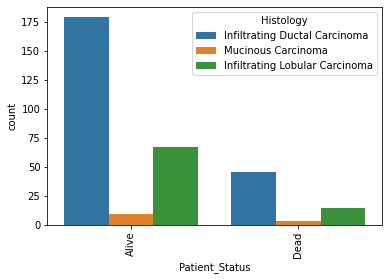

In [109]:
sns.countplot(x="Patient_Status", data=data, hue="Histology")
plt.xticks(rotation =90)
plt.show()

In [110]:
data['Tumour_Stage']=data['Tumour_Stage'].map({'I':1,'II':2,'III':3})
data['Histology']=data['Histology'].map({'Infiltrating Ductal Carcinoma':1,'Infiltrating Lobular Carcinoma':2,'Mucinous Carcinoma':3,})
data['ER status']=data['ER status'].map({'Positive':1})
data['PR status']=data['PR status'].map({'Positive':1})
data['HER2 status']=data['HER2 status'].map({'Positive':1,'Negative':2})
data['Gender']=data['Gender'].map({'MALE':0,'FEMALE':1})
data['Surgery_type']=data['Surgery_type'].map({'Other':1,'Modified Radical Mastectomy':2,'Lumpectomy':3,'Simple Mastectomy':4})
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,1,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2,Alive
1,43.0,1,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3,Dead
2,69.0,1,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1,Alive
3,56.0,1,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2,Alive
4,56.0,1,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1,Dead


## The Machine Learning Model


In [111]:
x=data[["Age","Gender","Protein1","Protein2","Protein3","Protein4","Tumour_Stage","Histology","ER status","PR status","HER2 status","Surgery_type"]]

y=data["Patient_Status"] 
from sklearn.model_selection import train_test_split

In [112]:
#Splitting data into train and test data
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=42)

In [113]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [114]:
y_predicted=model.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.828125

This accuracy is acceptable